<a href="https://colab.research.google.com/github/Nileshkl/Unsupervised-ML--Zomato-Restaurant-Clustering-Sentiment-Analysis-/blob/main/Project_Zomato_Restaurant_Clustering_and_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Zomato Restaurant Clustering and Sentiment Analysis



##### **Project Type**    - Unsupervised ML
* Clustering
* Sentiment Analysis

##### **Contribution**    - Individual
##### **Team Member 1 -** - Nileshkumar Lavand

# **Project Summary -**

This project centers around Zomato, a prominent online food delivery platform. It involves two key datasets: one for restaurant information and the other for user reviews.

The initial phase of this project involved rigorous data cleaning and preprocessing to ensure the data's suitability for comprehensive analysis. Subsequently, we conducted Exploratory Data Analysis (EDA) on both datasets, providing insights into the dataset's composition and features.

The core analytical components of this project encompassed K-means clustering to group similar restaurants, and sentiment analysis of user reviews. To visually interpret the sentiment analysis results, we utilized an LDA visualizer. Furthermore, we compared the results with supervised methods to obtain a more profound understanding.

In conclusion, this project offers a detailed exploration of Zomato's restaurant and review datasets, shedding light on clustering, sentiment analysis, and visualization to provide valuable insights for informed decision-making in the food industry.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


Project Title: Zomato Restaurant Clustering and Sentiment Analysis

Objective:
The objective of this project is to conduct EDA , Clustering and Sentiment Analysis on two datasets related to Zomato, a popular restaurant discovery and food delivery platform. The analysis aims to gain insights into restaurant clustering and user sentiment towards different restaurants listed on Zomato.

Datasets

1. Dataset 1: Zomato Restaurant's name and Metadata Details

  * Link: [Dataset 1](https://drive.google.com/file/d/1fP13I71IhCUpmaMLN_hldtPdwn2WYArj/view?usp=sharing)

  * Description: This dataset contains details of various restaurants listed on Zomato. It includes features such as restaurant name, links ,costs, collections, cuisines, timings.

2. Dataset 2: Zomato Restaurant Reviews

  * Link: [Dataset 2](https://drive.google.com/file/d/1dAa-rBk8qDGb18zlAVJmdvH93fCQeIBp/view?usp=sharing)

  * Description: This dataset contains user reviews for different restaurants on Zomato. It includes information such as the text of the review, reviewer, ratings, metadata, time, pictures.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [3]:
!pip install pandas==2.0.3

In [71]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import GridSearchCV
from wordcloud import WordCloud
import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [4]:
# Load Dataset
meta_df=pd.read_csv('/content/Zomato Restaurant names and Metadata.csv')
review_df=pd.read_csv('/content/Zomato Restaurant reviews.csv')

### Dataset First View

In [5]:
# Dataset First Look
meta_df.head()

,Name,Links,Cost,Collections,Cuisines,Timings
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
1,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800,Hyderabad's Hottest,"Biryani, North Indian, Chinese",11 AM to 11 PM
2,Flechazo,https://www.zomato.com/hyderabad/flechazo-gach...,"1,300","Great Buffets, Hyderabad's Hottest","Asian, Mediterranean, North Indian, Desserts","11:30 AM to 4:30 PM, 6:30 PM to 11 PM"
3,Shah Ghouse Hotel & Restaurant,https://www.zomato.com/hyderabad/shah-ghouse-h...,800,Late Night Restaurants,"Biryani, North Indian, Chinese, Seafood, Bever...",12 Noon to 2 AM
4,Over The Moon Brew Company,https://www.zomato.com/hyderabad/over-the-moon...,"1,200","Best Bars & Pubs, Food Hygiene Rated Restauran...","Asian, Continental, North Indian, Chinese, Med...","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no..."


In [6]:
# Dataset First Look
review_df.head()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0


###Dataset Last View

In [7]:
# Dataset Last Look
meta_df.tail()

,Name,Links,Cost,Collections,Cuisines,Timings
100,IndiBlaze,https://www.zomato.com/hyderabad/indiblaze-gac...,600,NaN,"Fast Food, Salad",11 AM to 11 PM
101,Sweet Basket,https://www.zomato.com/hyderabad/sweet-basket-...,200,NaN,"Bakery, Mithai","10 AM to 10 PM (Mon-Thu), 8 AM to 10:30 PM (Fr..."
102,Angaara Counts 3,https://www.zomato.com/hyderabad/angaara-count...,500,NaN,"North Indian, Biryani, Chinese",12 Noon to 11 PM
103,Wich Please,https://www.zomato.com/hyderabad/wich-please-1...,250,NaN,Fast Food,8am to 12:30AM (Mon-Sun)
104,Republic Of Noodles - Lemon Tree Hotel,https://www.zomato.com/hyderabad/republic-of-n...,"1,700",Pan-Asian Delicacies,"Thai, Asian, Chinese, Malaysian","11:30 AM to 3 PM, 7 PM to 12 Midnight"


In [8]:
# Dataset Last Look
review_df.tail()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
9995,Chinese Pavilion,Abhishek Mahajan,Madhumathi Mahajan Well to start with nice cou...,3,"53 Reviews , 54 Followers",6/5/2016 0:08,0
9996,Chinese Pavilion,Sharad Agrawal,This place has never disappointed us.. The foo...,4.5,"2 Reviews , 53 Followers",6/4/2016 22:01,0
9997,Chinese Pavilion,Ramandeep,"Bad rating is mainly because of ""Chicken Bone ...",1.5,"65 Reviews , 423 Followers",6/3/2016 10:37,3
9998,Chinese Pavilion,Nayana Shanbhag,I personally love and prefer Chinese Food. Had...,4,"13 Reviews , 144 Followers",5/31/2016 17:22,0
9999,Chinese Pavilion,Bhargava Krishna,Checked in here to try some delicious chinese ...,3.5,"472 Reviews , 1302 Followers",5/31/2016 16:41,6


### Dataset Rows & Columns count

In [10]:
# Dataset Rows & Columns count
print("Restaurant names and Metadata observations : ",meta_df.shape)
print("Restaurant reviews : ",review_df.shape)

Restaurant names and Metadata observations :  (105, 6)
Restaurant reviews :  (10000, 7)


### Dataset Information

In [12]:
# Dataset Info
meta_df.info()
print()
review_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         105 non-null    object
 1   Links        105 non-null    object
 2   Cost         105 non-null    object
 3   Collections  51 non-null     object
 4   Cuisines     105 non-null    object
 5   Timings      104 non-null    object
dtypes: object(6)
memory usage: 5.0+ KB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Restaurant  10000 non-null  object
 1   Reviewer    9962 non-null   object
 2   Review      9955 non-null   object
 3   Rating      9962 non-null   object
 4   Metadata    9962 non-null   object
 5   Time        9962 non-null   object
 6   Pictures    10000 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 547.0+ KB


#### Duplicate Values

In [14]:
# Dataset Duplicate Value Count
print("Duplicate Values in Restaurant names and Metadata observations dataset : ",meta_df.duplicated().sum())
print("Duplicate Values in Restaurant reviews dataset : ",review_df.duplicated().sum())

Duplicate Values in Restaurant names and Metadata observations dataset :  0
Duplicate Values in Restaurant reviews dataset :  36


#### Missing Values/Null Values

In [17]:
# Missing Values/Null Values Count
print(meta_df.isnull().sum())
print()
print(review_df.isnull().sum())

Name            0
Links           0
Cost            0
Collections    54
Cuisines        0
Timings         1
dtype: int64

Restaurant     0
Reviewer      38
Review        45
Rating        38
Metadata      38
Time          38
Pictures       0
dtype: int64


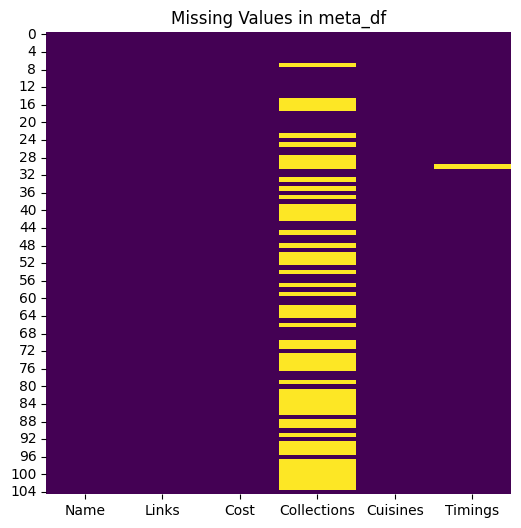

In [23]:
# Visualizing the missing values

# Visualize missing values in the meta_df dataset
plt.figure(figsize=(6, 6))
sns.heatmap(meta_df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values in meta_df')
plt.show()



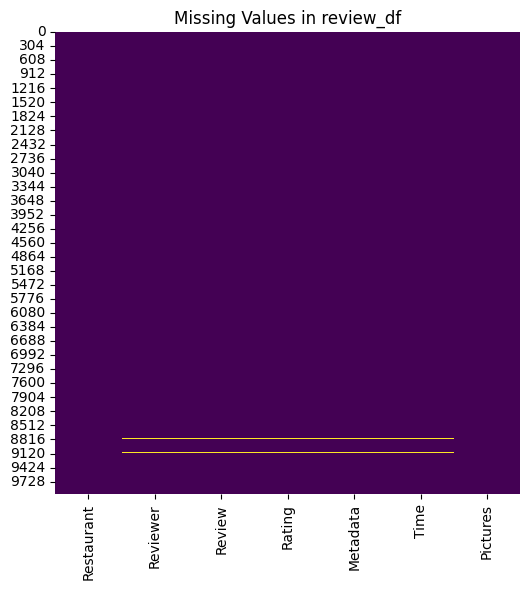

In [24]:
# Visualize missing values in the review_df dataset
plt.figure(figsize=(6, 6))
sns.heatmap(review_df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values in review_df')
plt.show()

### What did you know about your dataset?

Restaurant DataSet(meta_df):-

*   It contains 105 rows and 6 features.
*   Collection and Timing features has null values.
*   No duplicated Values.
*   Feature cost and timmings are of object datatype. \

Review Dataset(review_df):-
*   It contains 10000 rows and 7 features.
*   All features have null values except picture and restaurant
*   36 duplicated rows.
*   Rating and Time are of object datatype.


## ***2. Understanding Your Variables***

In [29]:
# Dataset Columns
print(meta_df.columns)
print(review_df.columns)

Index(['Name', 'Links', 'Cost', 'Collections', 'Cuisines', 'Timings'], dtype='object')
Index(['Restaurant', 'Reviewer', 'Review', 'Rating', 'Metadata', 'Time',
       'Pictures'],
      dtype='object')


In [35]:
# Dataset Describe
meta_df.describe(include='all')

,Name,Links,Cost,Collections,Cuisines,Timings
count,105,105,105,51,105,104
unique,105,105,29,42,92,77
top,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,500,Food Hygiene Rated Restaurants in Hyderabad,"North Indian, Chinese",11 AM to 11 PM
freq,1,1,13,4,4,6


In [36]:
review_df.describe(include='all')

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
count,10000,9962,9955,9962,9962,9962,10000.000000
unique,100,7446,9364,10,2477,9782,NaN
top,Beyond Flavours,Parijat Ray,good,5,1 Review,7/29/2018 20:34,NaN
freq,100,13,237,3832,919,3,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,0.748600
std,NaN,NaN,NaN,NaN,NaN,NaN,2.570381
min,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,0.000000


### Variables Description

#### **Restaurant Dataset:**
Name : Name of Restaurants\
Links : URL Links of Restaurants\
Cost : Per person estimated Cost of dining\
Collection : Tagging of Restaurants w.r.t. Zomato categories\
Cuisines : Cuis
ines served by Restaurants\
Timings : Restaurant Timings
#### **Review Dataset:**
Restaurant : Name of the Restaurant\
Reviewer : Name of the Reviewer\
Review : Review Text\
Rating : Rating Provided by Reviewer\
MetaData : Reviewer Metadata - No. of Reviews and followers\
Time: Date and Time of Review\
Pictures : No. of pictures posted with review

### Check Unique Values for each variable.

In [39]:
# Check Unique Values for each variable.
print("Meta dataset:\n",meta_df.nunique())
print()
print("Review dataset:\n",review_df.nunique())

Meta dataset:
 Name           105
Links          105
Cost            29
Collections     42
Cuisines        92
Timings         77
dtype: int64

Review dataset:
 Restaurant     100
Reviewer      7446
Review        9364
Rating          10
Metadata      2477
Time          9782
Pictures        36
dtype: int64


## 3. ***Data Wrangling***

### Data Wrangling Code

In [40]:
# Write your code to make your dataset analysis ready.
meta_df['Cost'] = meta_df['Cost'].str.replace(',','').astype('int64')

In [41]:
# removing null values
review_df = review_df.dropna()

In [42]:
#converting rating to float
review_df.drop(review_df[(review_df['Rating']=='Like')].index,inplace=True)
review_df['Rating']= review_df['Rating'].astype('float64')
review_df.shape

(9954, 7)

In [44]:
# Extracting details from metadata
review_df['Reviewer_Total_Review']=review_df['Metadata'].str.split(',').str[0]
review_df['Reviewer_Followers']=review_df['Metadata'].str.split(',').str[1]
review_df['Reviewer_Total_Review']=pd.to_numeric(review_df['Reviewer_Total_Review'].str.split(' ').str[0])
review_df['Reviewer_Followers']=pd.to_numeric(review_df['Reviewer_Followers'].str.split(' ').str[1])

In [47]:
review_df.head()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures,Reviewer_Total_Review,Reviewer_Followers
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5.0,"1 Review , 2 Followers",5/25/2019 15:54,0,1,2.0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5.0,"3 Reviews , 2 Followers",5/25/2019 14:20,0,3,2.0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5.0,"2 Reviews , 3 Followers",5/24/2019 22:54,0,2,3.0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5.0,"1 Review , 1 Follower",5/24/2019 22:11,0,1,1.0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5.0,"3 Reviews , 2 Followers",5/24/2019 21:37,0,3,2.0


In [67]:
#Extracting review time,year,month and Hour for analysis
review_df['Time']=pd.to_datetime(review_df['Time'])
review_df['Review_Year'] = pd.DatetimeIndex(review_df['Time']).year
review_df['Review_Month'] = pd.DatetimeIndex(review_df['Time']).month
review_df['Review_Hour'] = pd.DatetimeIndex(review_df['Time']).hour

### What all manipulations have you done and insights you found?

Restaurant Data:

* I've converted the data type of the "cost" feature from object to integer for improved consistency and numeric analysis.

Review Data:

* Since there were very few missing values in the review data, I opted to remove them to maintain data integrity.
* Additionally, I enhanced the dataset by converting the "rating" feature from object to float for precise analysis.
* I enriched the dataset by extracting valuable information such as "followers" and "reviews" from the metadata.
* To provide a more comprehensive analysis, I also extracted the "Time," "Year," "Month," and "Hour" of when each review was created, enabling more in-depth temporal insights.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

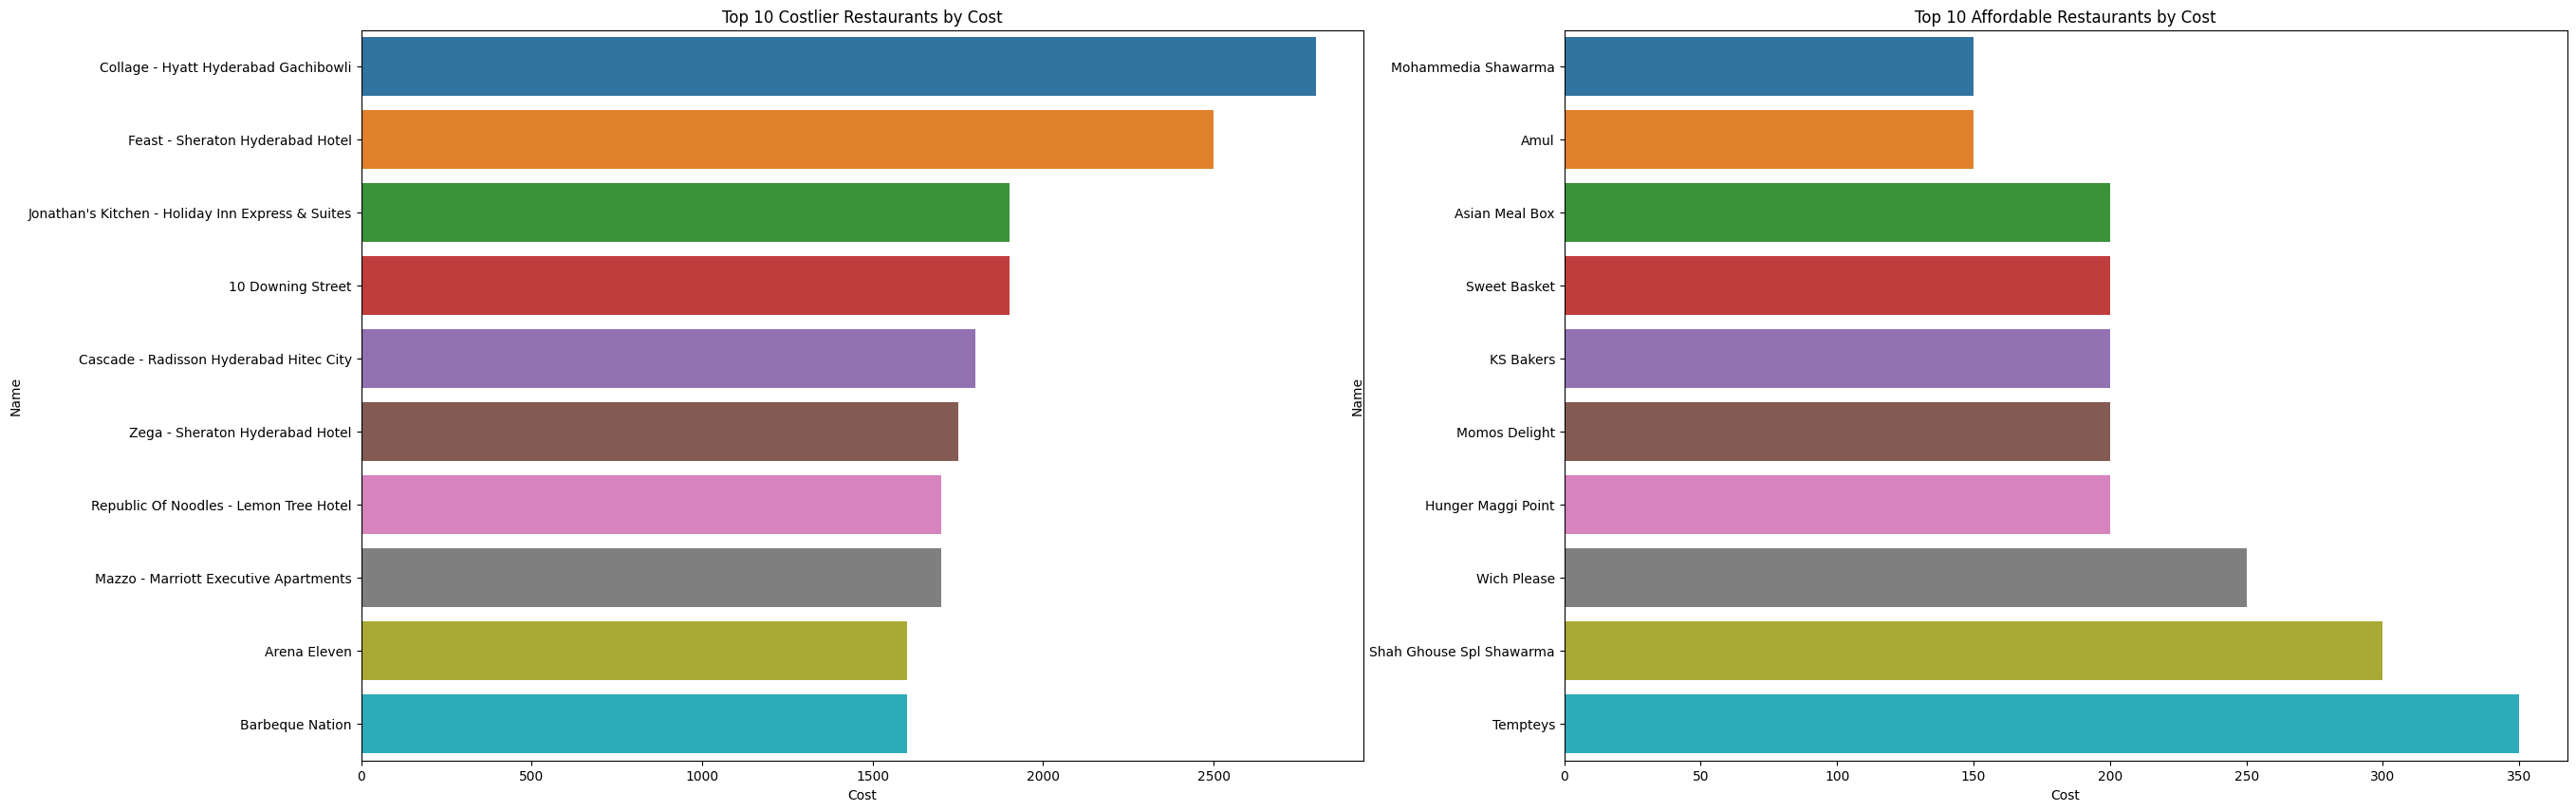

In [53]:
# Chart - 1 visualization code
# Costlier and affordable restaurants
# Sort the data by 'Cost' in descending order for costlier restaurants
costlier_data = meta_df[['Name', 'Cost']].sort_values(by='Cost', ascending=False).head(10)

# Sort the data by 'Cost' in ascending order for affordable restaurants
affordable_data = meta_df[['Name', 'Cost']].sort_values(by='Cost', ascending=True).head(10)

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(30, 10))

# Plot costlier restaurants
sns.barplot(data=costlier_data, x='Cost', y='Name', ax=axes[0])
axes[0].set_title("Top 10 Costlier Restaurants by Cost")

# Plot affordable restaurants
sns.barplot(data=affordable_data, x='Cost', y='Name', ax=axes[1])
axes[1].set_title("Top 10 Affordable Restaurants by Cost")

plt.show()

##### 1. Why did you pick the specific chart?

To identify the more expensive restaurants.

##### 2. What is/are the insight(s) found from the chart?

Among all the restaurants, Collage at Hyatt Hyderabad Gachibowli is the priciest.






##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

We can recommend this restaurant to customers who are looking for upscale dining experiences with higher-priced menu items






#### Chart - 2

In [78]:
# Chart - 2 visualization code
# Top 10 Cuisines by Restaurant count
# Splitting all cuisines to list
cuisine_list = meta_df['Cuisines'].str.split(', ').apply(lambda x : [word for word in x] )

In [60]:
cuisine_top_dict = {}
for x in cuisine_list:
  for cuisine in x:
    if cuisine in cuisine_top_dict:
      cuisine_top_dict[cuisine] += 1
    else :
      cuisine_top_dict[cuisine] = 1
cuisine_top_df = pd.DataFrame(((k,vals) for k,vals in cuisine_top_dict.items()),columns=['Cuisine','Restaurant count']).sort_values(by= 'Restaurant count' ,ascending=False).head(10)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'North Indian'),
  Text(1, 0, 'Chinese'),
  Text(2, 0, 'Continental'),
  Text(3, 0, 'Biryani'),
  Text(4, 0, 'Fast Food'),
  Text(5, 0, 'Asian'),
  Text(6, 0, 'Italian'),
  Text(7, 0, 'Desserts'),
  Text(8, 0, 'South Indian'),
  Text(9, 0, 'Bakery')])

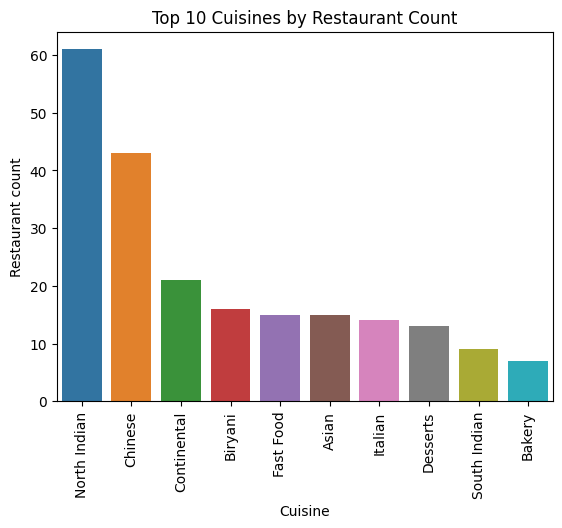

In [61]:
sns.barplot(x = cuisine_top_df['Cuisine'], y = cuisine_top_df['Restaurant count'])
plt.title("Top 10 Cuisines by Restaurant Count")
plt.xticks(rotation=90)

##### 1. Why did you pick the specific chart?

It presents a variety of cuisines offered by restaurants in terms of count.

##### 2. What is/are the insight(s) found from the chart?

North Indian restaurants are prevalent, primarily due to a significant number of patrons originating from the North Indian region.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

As evident from the data, there is a high demand for North Indian and Chinese cuisine. Therefore, it makes strategic sense to focus on targeting these customer segments.

#### Chart - 3

Text(0, 0.5, 'Max Followers')

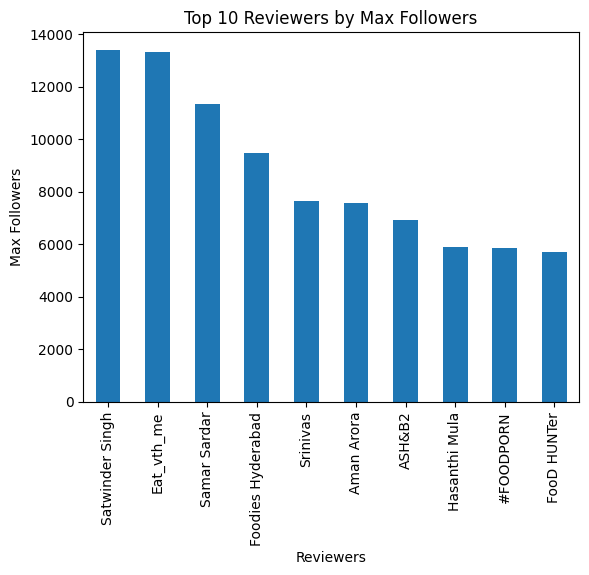

In [63]:
# Chart - 3 visualization code
# Group the data by 'Reviewer' and find the maximum 'Reviewer_Followers' for each reviewer
max_followers_by_reviewer = review_df.groupby('Reviewer')['Reviewer_Followers'].max()

# Sort the results in descending order and select the top 10
top_10_reviewers = max_followers_by_reviewer.sort_values(ascending=False).head(10)

# Create a bar plot
top_10_reviewers.plot(kind='bar')

# Set the plot title and labels if needed
plt.title("Top 10 Reviewers by Max Followers")
plt.xlabel("Reviewers")
plt.ylabel("Max Followers")


##### 1. Why did you pick the specific chart?

These individuals have the highest number of followers, indicating that their reviews have the potential to influence a larger audience.

##### 2. What is/are the insight(s) found from the chart?

We've discovered that Satwinder Singh and Eat_with_me are the top two reviewers with the largest number of followers.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

If we require advertising services, these individuals could be potential choices.

#### Chart - 4

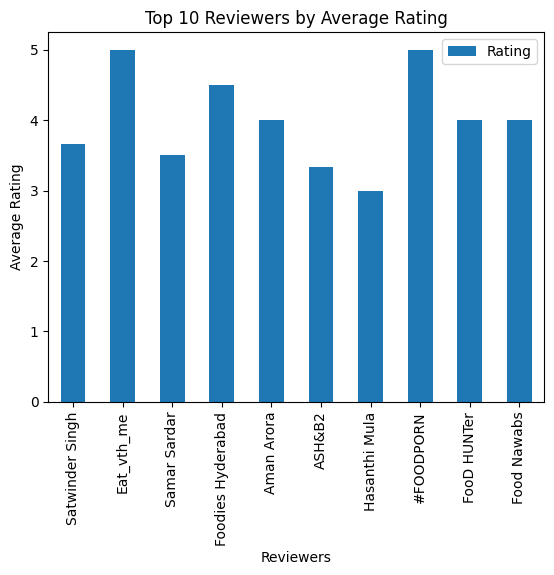

In [64]:
# Chart - 4 visualization code
# Group the data by 'Reviewer', calculate the mean 'Rating' and maximum 'Reviewer_Followers'
reviewer_stats = review_df.groupby('Reviewer')[['Rating', 'Reviewer_Followers']].mean()

# Sort the results by 'Reviewer_Followers' in descending order and select the top 10
top_10_reviewers_stats = reviewer_stats.sort_values(by=['Reviewer_Followers'], ascending=False).head(10)

# Drop the 'Reviewer_Followers' column as it's not needed in the plot
top_10_reviewers_stats.drop(['Reviewer_Followers'], axis=1, inplace=True)

# Create a bar plot
top_10_reviewers_stats.plot(kind='bar')

# Set the plot title
plt.title("Top 10 Reviewers by Average Rating")

# Set labels if needed
plt.xlabel("Reviewers")
plt.ylabel("Average Rating")

# Show the plot
plt.show()

##### 1. Why did you pick the specific chart?

Understanding the average ratings of the most-followed reviewers is essential for assessing their potential biases.

##### 2. What is/are the insight(s) found from the chart?

For instance, reviewers like 'eat_vth_me' and 'foodporn' have consistently given an average rating of 5. This could imply either frequent visits to top-notch restaurants or a tendency to rate all restaurants with a perfect score.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Such insights given in charts are valuable for sentiment analysis and provide essential context for restaurant reviews.

#### Chart - 5

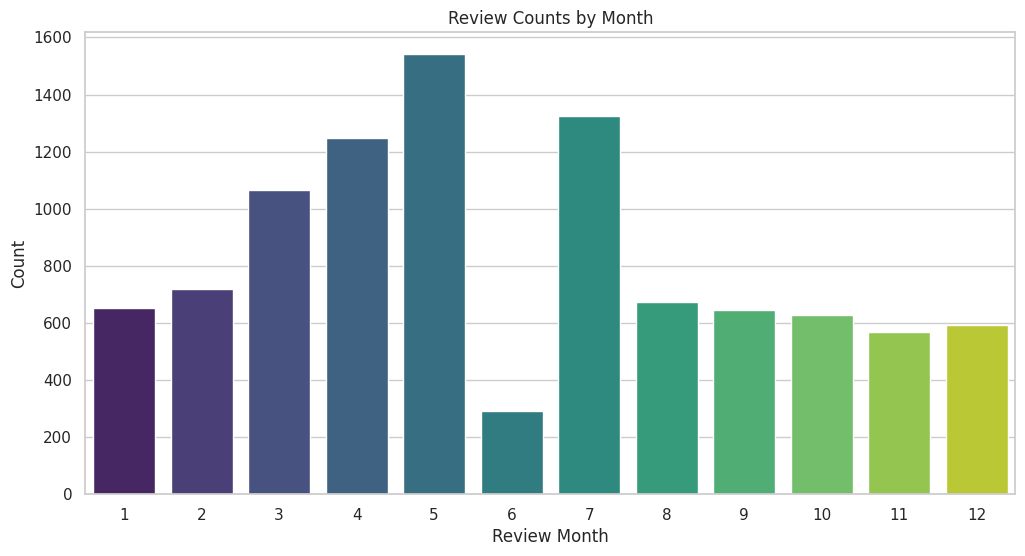

In [69]:
# Chart - 5 visualization code
# Create a bar chart for Review_Month
review_month_counts = review_df['Review_Month'].value_counts()

# Set plot style
sns.set(style="whitegrid")

# Create the bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=review_month_counts.index, y=review_month_counts.values, palette="viridis")

# Set x and y labels
plt.xlabel("Review Month")
plt.ylabel("Count")

# Set the title
plt.title("Review Counts by Month")

# Show the plot
plt.show()

##### 1. Why did you pick the specific chart?

To understand the peak engagement periods for restaurants.

##### 2. What is/are the insight(s) found from the chart?

Feb to Aug there is very active period for restaurants except June.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

During these time frames, Zomato may consider increasing their delivery personnel and offering promotional codes to boost activity in less active periods

#### Chart - 6

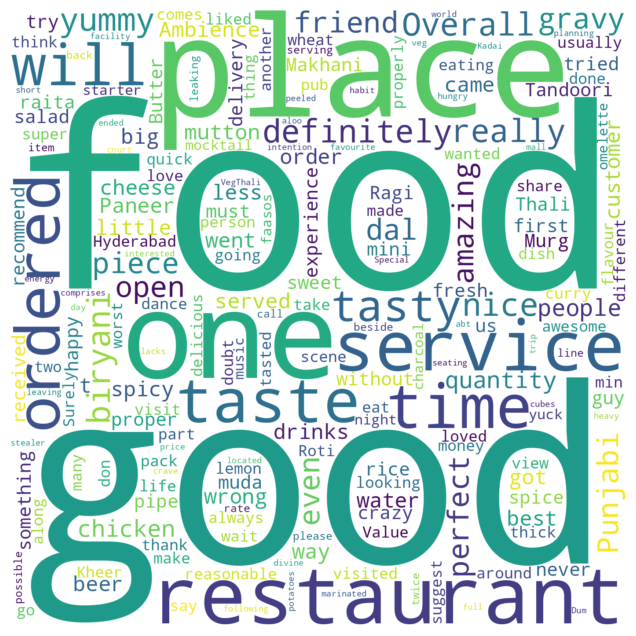

In [75]:
# Chart - 6 visualization code
# Combine the top 30 reviews into a single text
top_reviews_text = " ".join(name for name in review_df.sort_values('Review', ascending=False).Review[:30])

# Create a WordCloud with specified parameters
word_cloud = WordCloud(
    width=1400,
    height=1400,
    collocations=False,
    background_color='white'
).generate(top_reviews_text)

# Set up the plot
plt.figure(figsize=(15, 8))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")

# Display the Word Cloud
plt.show()

##### 1. Why did you pick the specific chart?

The Word Cloud chart was chosen for its ability to visually represent the most frequent words in the top 30 reviews, offering a concise summary of prominent themes and sentiments.

##### 2. What is/are the insight(s) found from the chart?

The terms 'food,' 'good,' and 'place' are the most commonly occurring words in the reviews.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights gained from the Word Cloud can be valuable for creating a positive business impact. If the prevalent words in the Word Cloud reflect positive experiences, it can inform the restaurant's strengths and areas where they excel.

#### Chart - 7

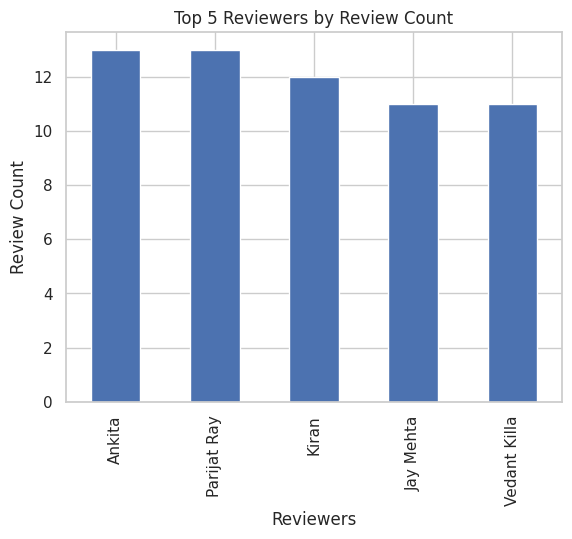

In [76]:
# Chart - 7 visualization code
# Get the top 5 reviewers by review count
top_reviewers = review_df['Reviewer'].value_counts().head(5)

# Create a bar plot
top_reviewers.plot(kind='bar')

# Set the plot title and labels if needed
plt.title("Top 5 Reviewers by Review Count")
plt.xlabel("Reviewers")
plt.ylabel("Review Count")

# Show the plot
plt.show()

##### 1. Why did you pick the specific chart?

To identify the reviewers who are most active.

##### 2. What is/are the insight(s) found from the chart?

We have determined that Ankita, Parijat, and Kiran are the top three reviewers based on their activity.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

We can consider engaging Ankita, Parijat, and Kiran as reviewers for multiple restaurants. Given their prolific reviewing activity, their preferences align with the type of restaurants they may favor.

#### Chart - 8

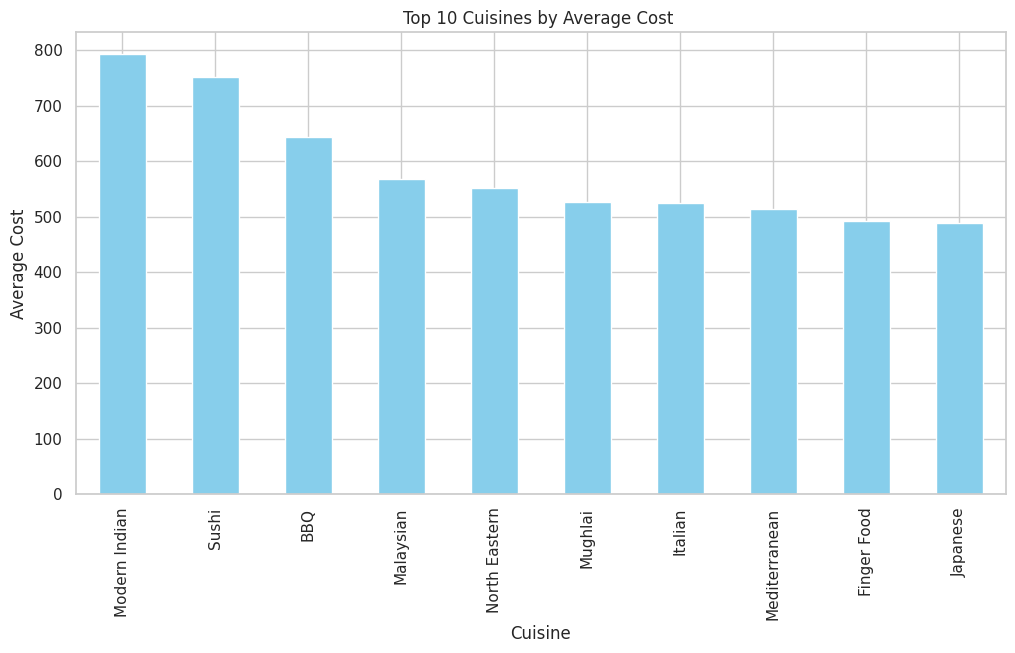

In [82]:
# Chart - 8 visualization code
# Calculate the average cost per cuisine
cuisine_cost = meta_df['Cuisines'].str.split(', ').explode().to_frame(name='Cuisine')
cuisine_cost['Cost'] = meta_df['Cost'] / meta_df['Cuisines'].str.count(', ') + 1

# Group and calculate the average cost per cuisine
cuisine_avg_cost = cuisine_cost.groupby('Cuisine')['Cost'].mean()

# Exclude Lebanese cuisine
cuisine_avg_cost = cuisine_avg_cost[cuisine_avg_cost.index != 'Lebanese']

# Select the top 10 cuisines
top_10_cuisines = cuisine_avg_cost.nlargest(10)

# Create a bar plot for the top 10 cuisines
plt.figure(figsize=(12, 6))
top_10_cuisines.plot(kind='bar', color='skyblue')
plt.title('Top 10 Cuisines by Average Cost ')
plt.xlabel('Cuisine')
plt.ylabel('Average Cost')
plt.xticks(rotation=90)
plt.show()

##### 1. Why did you pick the specific chart?

It reveals the cuisine with the highest average cost from the given list.

##### 2. What is/are the insight(s) found from the chart?

I've identified that 'Modern Indian,' 'Sushi,' and 'BBQ' cuisines rank among the most expensive options in terms of cost

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, Restaurant owners or operators can leverage this information to make strategic decisions, such as pricing these cuisines competitively and tailoring marketing efforts to attract customers seeking premium dining experiences. By catering to the demand for these higher-cost cuisines, the business can potentially increase its revenue and profitability.

#### Chart - 9 - Correlation Heatmap

In [73]:
# Correlation Heatmap visualization code
# Heatmap of review_df
meta = meta_df.rename(columns = {'Name':'Restaurant'})
merged = meta.merge(review_df, on = 'Restaurant')
merged.shape


(9954, 17)

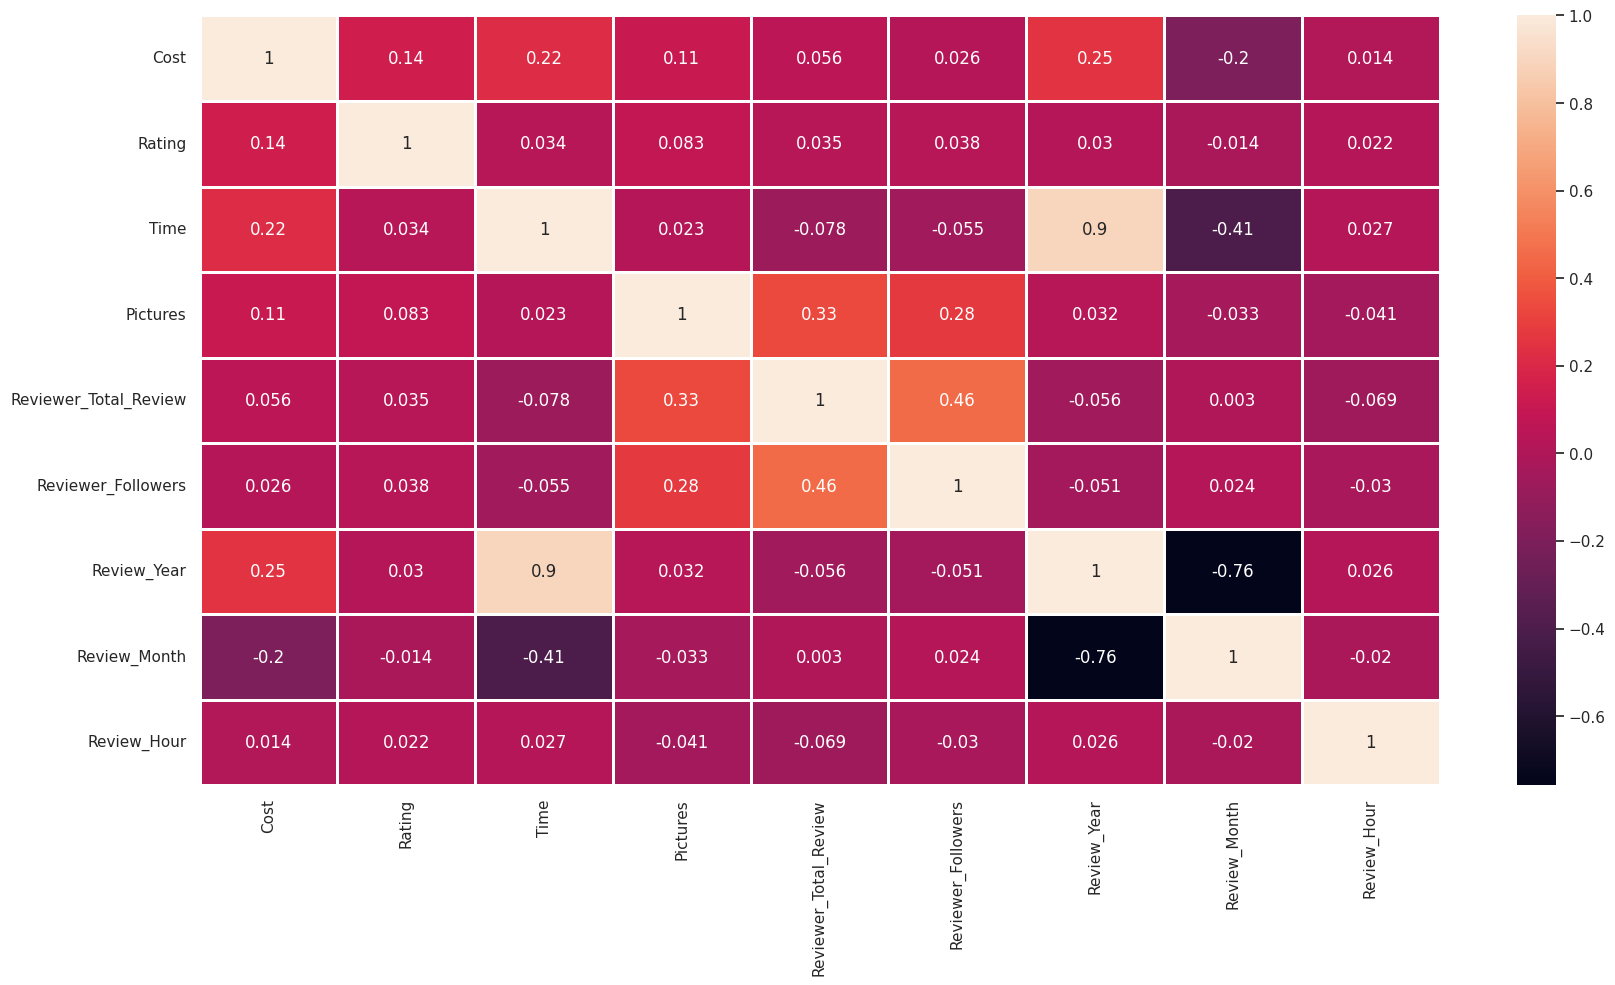

In [74]:
# Create a correlation matrix for the desired columns
correlation_matrix = merged[merged.describe().columns].corr()

# Set the figure size
fig, ax = plt.subplots(figsize=(20, 10))

# Create a heatmap with annotations
sns.heatmap(correlation_matrix, ax=ax, annot=True, cmap='rocket', linewidths=1)

# Show the heatmap
plt.show()

##### 1. Why did you pick the specific chart?

To assess the correlation among all numeric variables.

##### 2. What is/are the insight(s) found from the chart?

The dataset contains limited data for certain years, such as 2018 and 2019, with particularly sparse data for the years 2016 and 2017. Consequently, the correlation analysis may not yield significant insights.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

* Restaurants with higher ratings tend to have higher prices.
* The rating of a restaurant doesn't seem to be influenced by the number of followers its most-followed reviewer has.
* Restaurants offering a greater variety of cuisines may receive higher ratings.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis : No correlation between rating and cost.\
Alternate Hypothesis : There is a correlation between them.\
Test : Simple Linear Regression analysis

#### 2. Perform an appropriate statistical test.

In [83]:
# Perform Statistical Test to obtain P-Value
import statsmodels.formula.api as sm
model = sm.ols(formula='Rating ~ Cost', data= merged).fit()
p_value = model.pvalues[1]
if p_value < 0.05 :
  print('Null Hypothesis is rejected')
else:
  print('Fail to reject Null Hypothesis')

Null Hypothesis is rejected


##### Which statistical test have you done to obtain P-Value?

The statistical test conducted to obtain the p-value is simple linear regression.

##### Why did you choose the specific statistical test?

Linear regression was chosen as it assesses the relationship between 'Rating' and 'Cost,' helping determine if cost significantly impacts restaurant ratings.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [ ]:
# Expand Contraction

#### 2. Lower Casing

In [ ]:
# Lower Casing

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords

In [ ]:
# Remove White spaces

#### 6. Rephrase Text

In [ ]:
# Rephrase Text

#### 7. Tokenization

In [ ]:
# Tokenization

#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [ ]:
# POS Taging

#### 10. Text Vectorization

In [ ]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data

### 6. Data Scaling

In [ ]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why?

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [ ]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***